In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

Grid-World Scenario Visualization

In [33]:
class Robotenv(gym.Env):
    def __init__(self, stochastic=False):
        super(Robotenv, self).__init__()
        self.action_space = spaces.Discrete(6)
        self.grid_size = (6, 6)
        self.obstacles = [(2, 2), (3, 3), (4, 4)]
        self.pickup_loc = (0, 0)
        self.dropoff_loc = (5, 5)
        self.observation_space = spaces.Discrete(72)
        self.max_timesteps = 10
        self.stochastic = stochastic
        self.state = (0, 0, False)
        self.timestep = 0

    def reset(self, **kwargs):
        self.state = (self.pickup_loc[0], self.pickup_loc[1], False)
        self.timestep = 0
        obs = self.state
        info = {}
        return obs, info

    def step(self, action):
        row, col, carrying = self.state
        reward = -1
        done = False
        if self.stochastic and action in [0, 1, 2, 3]:
            if random.random() < 0.1:
                action = -1
        if action in [0, 1, 2, 3]:
            next_row, next_col = row, col
            if action == 0:       #Up
                next_row = row - 1
            elif action == 1:     #Down
                next_row = row + 1
            elif action == 2:     #Left
                next_col = col - 1
            elif action == 3:     #Right
                next_col = col + 1
            if 0 <= next_row < self.grid_size[0] and 0 <= next_col < self.grid_size[1]:
                if (next_row, next_col) in self.obstacles: #when hitting the obstacles
                    reward = -20
                else:
                    row, col = next_row, next_col
            else:                   #when hitting the wall boundary
                reward = -20

        elif action == 4:          #Pickup the item
            if (row, col) == self.pickup_loc and carrying == False:
                carrying = True
                reward = 25
            else:
                reward = -1

        elif action == 5:          #Drop the item
            if (row, col) == self.dropoff_loc and carrying == True:
                carrying = False
                reward = 100
                done = True
            else:
                reward = -1

        self.state = (row, col, carrying)
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        return self.state, reward, done, {}

    def render(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        background = Image.open("/content/background.png")
        ax.imshow(background, extent=[-0.5, 5.5, 5.5, -0.5], zorder=0)
        ax.set_xticks([])
        ax.set_yticks([])
        obstacle_img = Image.open("/content/obstacle.png")
        pickup_img = Image.open("/content/item.png")
        dropoff_img = Image.open("/content/destination.png")
        agent_img_path = "/content/agent_carrying.png" if self.state[2] else "/content/agent_idle.png"
        agent_img = Image.open(agent_img_path)
        for r, c in self.obstacles:
            ax.imshow(obstacle_img, extent=[c-0.5, c+0.5, r-0.5, r+0.5], zorder=3)
        ax.imshow(pickup_img, extent=[self.pickup_loc[1]-0.5, self.pickup_loc[1]+0.5, self.pickup_loc[0]-0.5, self.pickup_loc[0]+0.5], zorder=4)
        ax.imshow(dropoff_img, extent=[self.dropoff_loc[1]-0.5, self.dropoff_loc[1]+0.5, self.dropoff_loc[0]-0.5, self.dropoff_loc[0]+0.5], zorder=4)
        row, col, _ = self.state
        ax.imshow(agent_img, extent=[col-0.5, col+0.5, row-0.5, row+0.5], zorder=5)
        for i in range(7): #Drawing the grid lines
            ax.plot([-0.5, 5.5], [i-0.5, i-0.5], color='black', lw=1, zorder=6)
            ax.plot([i-0.5, i-0.5], [-0.5, 5.5], color='black', lw=1, zorder=6)
        ax.set_title("Warehouse Robot Environment")
        plt.draw()
        plt.show()

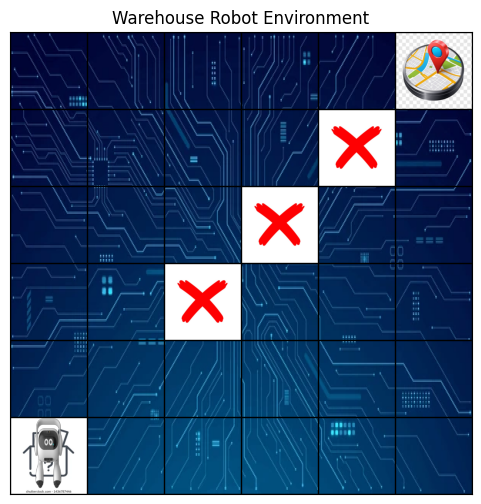

In [34]:
env = Robotenv()
terminated, truncated = False, False
obs, info = env.reset()
env.render()

In [35]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.action_space = env.action_space
        self.observation_space = env.observation_space
    def step(self, observation):
        return self.action_space.sample()

Running Deterministic Environment
Deterministic Run:
Action: 5 , Reward: -1 , Done: False


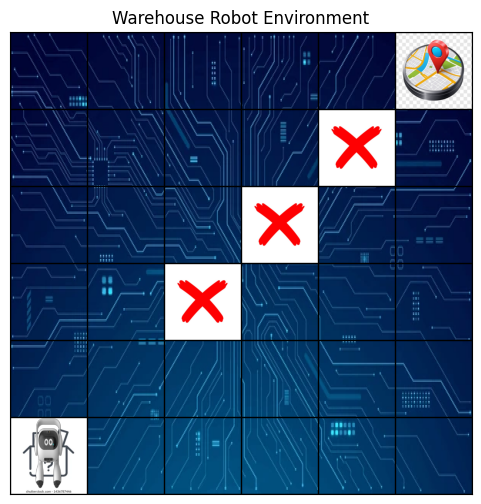

Action: 3 , Reward: -1 , Done: False


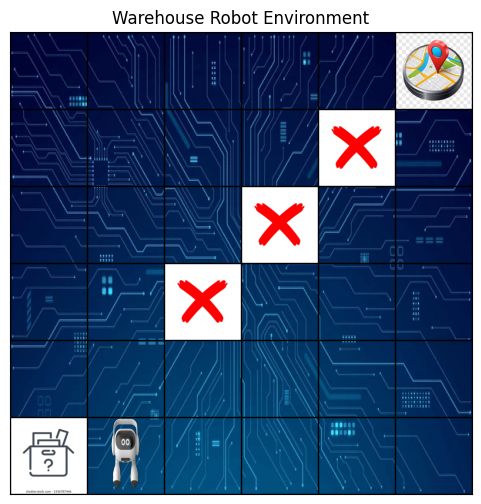

Action: 0 , Reward: -20 , Done: False


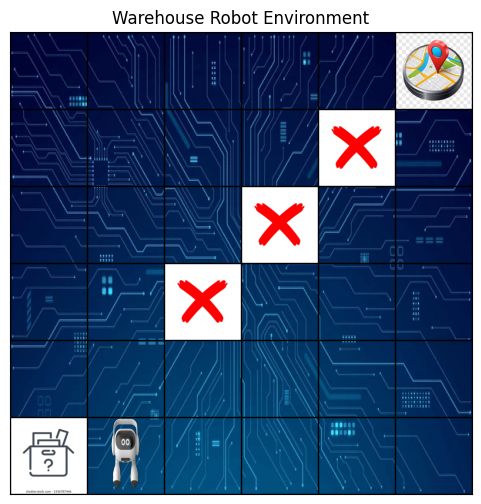

Action: 0 , Reward: -20 , Done: False


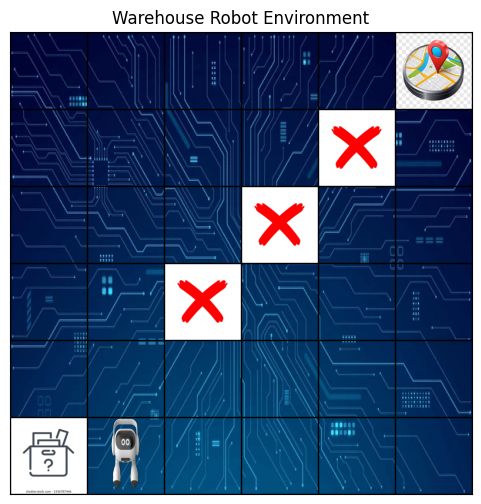

Action: 5 , Reward: -1 , Done: False


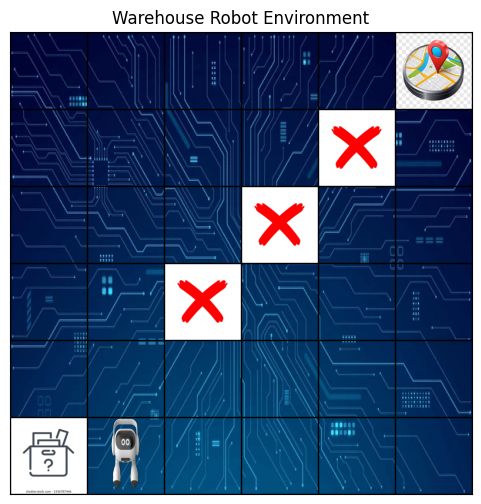

Action: 4 , Reward: -1 , Done: False


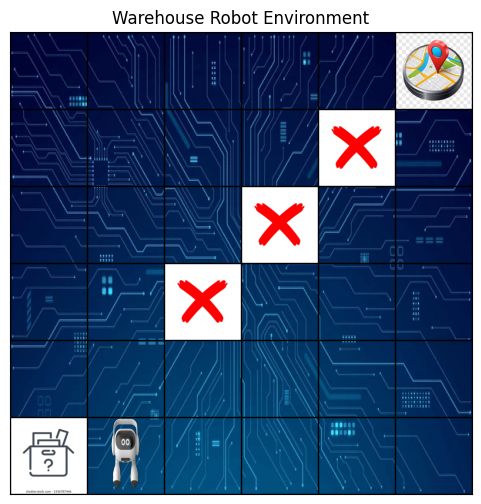

Action: 5 , Reward: -1 , Done: False


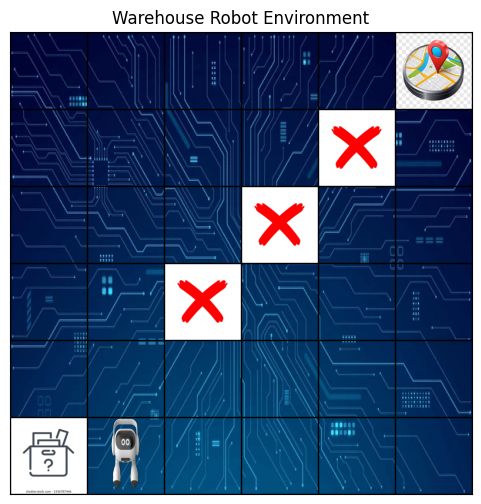

Action: 5 , Reward: -1 , Done: False


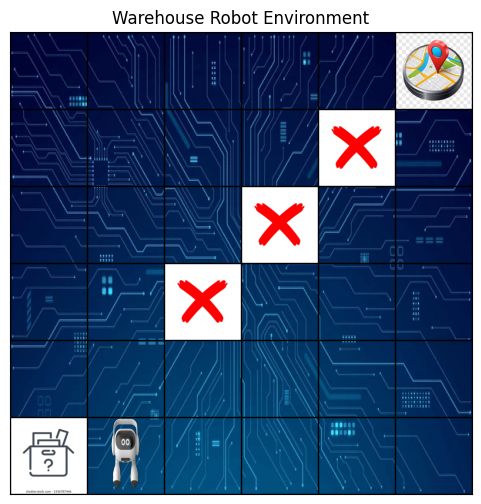

Action: 4 , Reward: -1 , Done: False


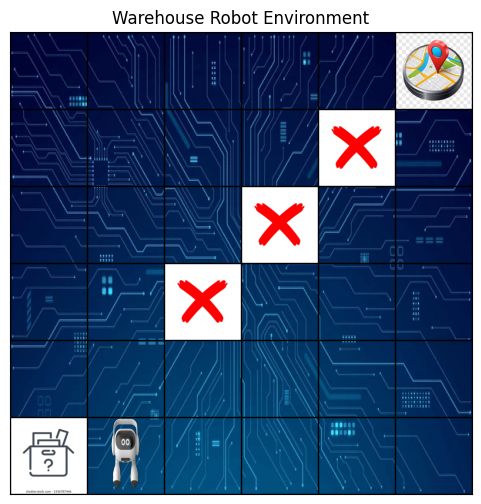

Action: 4 , Reward: -1 , Done: True


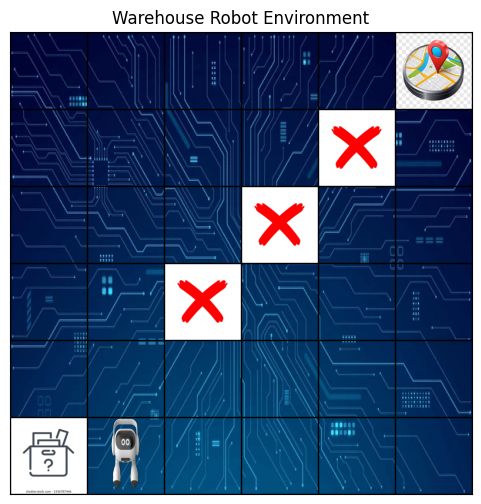

Deterministic terminated
Running Stochastic Environment
Stochastic Run:
Action: 2 , Reward: -20 , Done: False


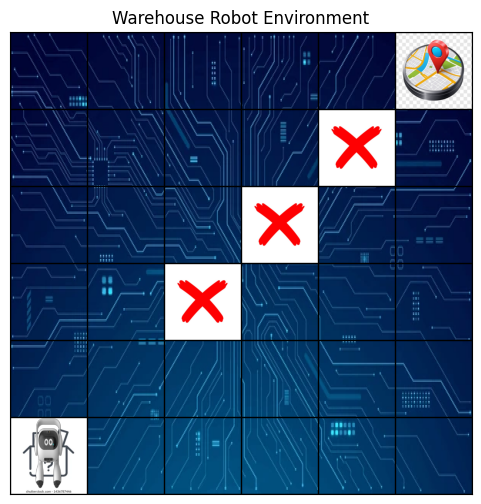

Action: 5 , Reward: -1 , Done: False


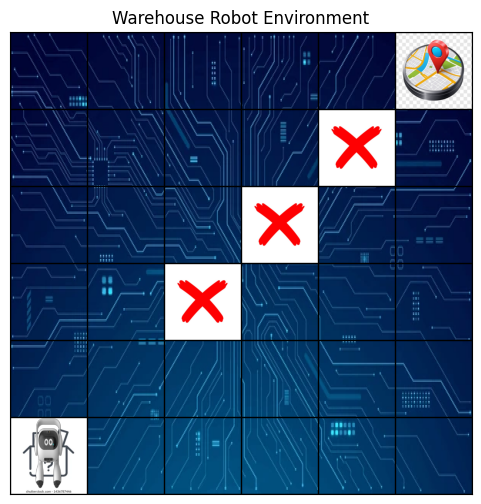

Action: 4 , Reward: 25 , Done: False


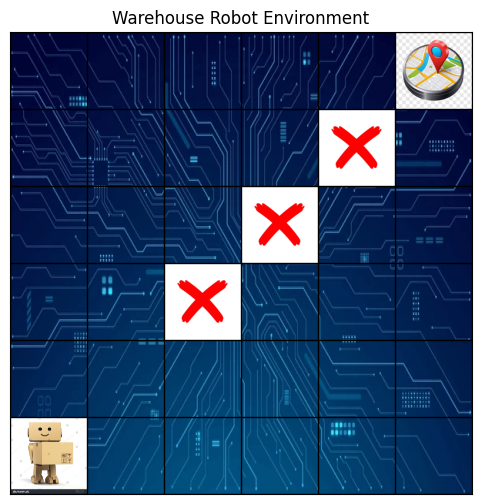

Action: 1 , Reward: -1 , Done: False


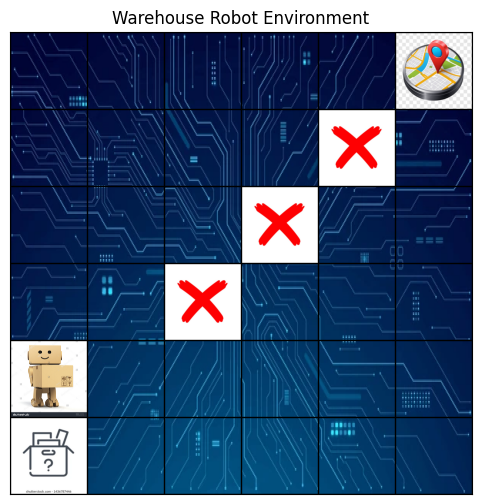

Action: 2 , Reward: -20 , Done: False


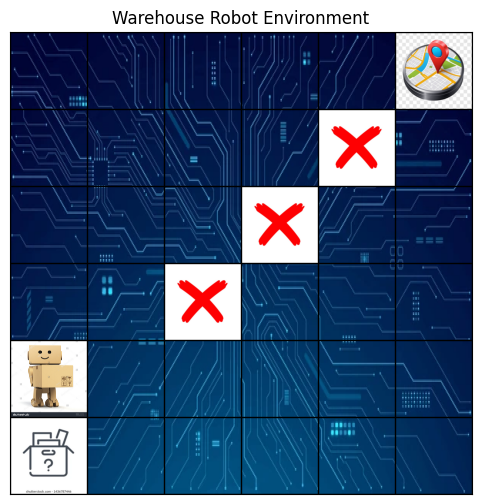

Action: 1 , Reward: -1 , Done: False


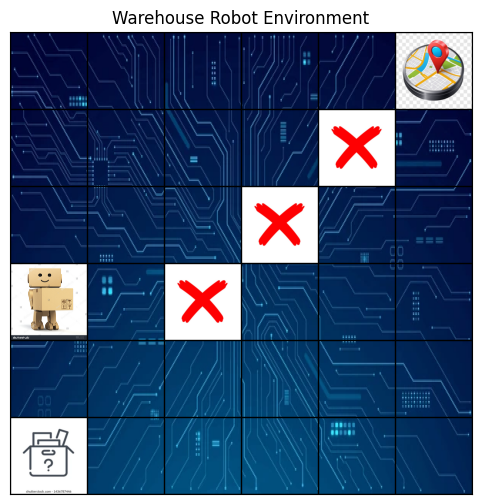

Action: 4 , Reward: -1 , Done: False


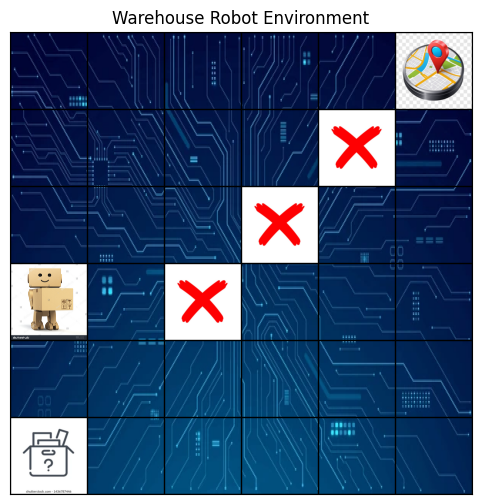

Action: 4 , Reward: -1 , Done: False


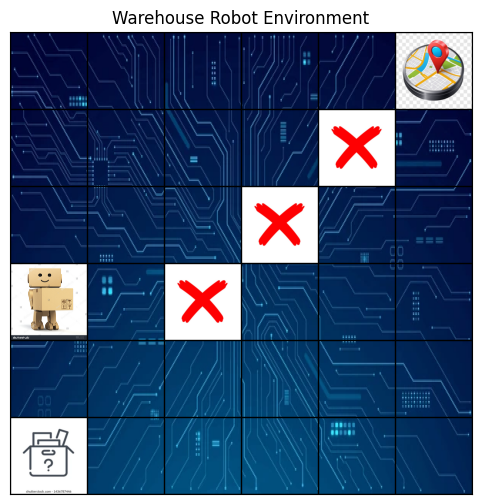

Action: 0 , Reward: -1 , Done: False


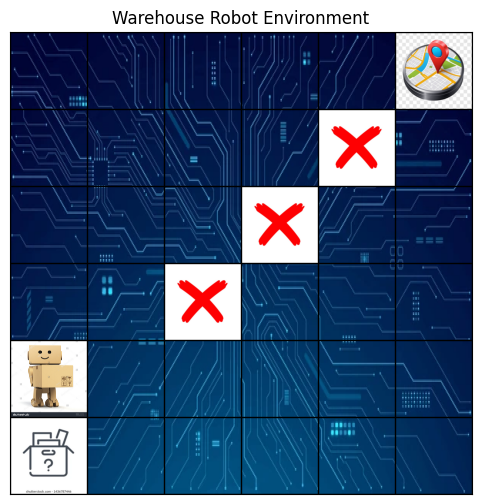

Action: 2 , Reward: -20 , Done: True


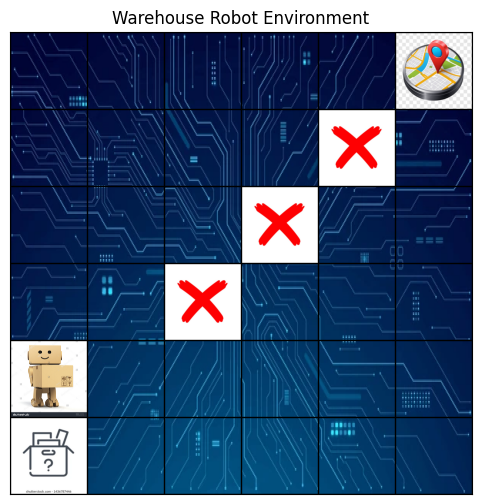

Stochastic terminated


In [36]:
if __name__ == '__main__':
  print("Running Deterministic Environment")
  env = Robotenv(stochastic = False)
  agent = RandomAgent(env)
  obs, info = env.reset()
  terminated, truncated = False, False
  print("Deterministic Run:")
  while not terminated:
    action = agent.step(obs)
    obs, reward, terminated, truncated = env.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env.render()
  print("Deterministic terminated")

  print("Running Stochastic Environment")
  env_st = Robotenv(stochastic = True)
  agent_st = RandomAgent(env)
  obs, info = env_st.reset()
  terminated, truncated = False, False
  print("Stochastic Run:")
  while not terminated:
    action = agent_st.step(obs)
    obs, reward, terminated, truncated = env_st.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env_st.render()
  print("Stochastic terminated")